# TP2 - Realidade Aumentada

Aluno: Vinicius Silva Gomes

Matrícula: 2021421869

In [25]:
# Importing libraries

import numpy as np
import cv2
import os

import matplotlib.pyplot as plt

from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

from PIL import Image

from objloader import *

## Extraindo frames do vídeo para calibração

Esse pequeno script foi feito para extrair os frames do vídeo e usá-los para calibrar a câmera e obter os parâmetros intrínsecos da câmera. O script, em suma, carrega o vídeo, usando o OpenCV, e salva cada frame no disco, em uma pasta chamada ./fames.

Dessa pasta, foram escolhidos 6 frames que apresentavam angulações, distâncias e rotações diferentes do tabuleiro xadrez e esses frames foram separados para serem usados na calibração da câmera.

OBS: Para que as imagens sejam salvas, a pasta ./frames precisa ter sido criada previamente.

In [ ]:
# Extract frames from the video

cam = cv2.VideoCapture("./entrada.mp4")

current_frame = 0

while(True):
    ret, frame = cam.read()

    if ret:
        # A ./frames/ folder must exist for this code to work
        name = './frames/frame' + str(current_frame) + '.jpg'
        print ('Creating... ' + name)
  
        cv2.imwrite(name, frame)
  
        current_frame += 1
    else:
        break

cam.release()
cv2.destroyAllWindows()

## Obtendo os parâmetros intrínsecos

Com os frames selecionados, foi usado o MatLAB para obter os parâmetros intrísecos da câmera. A opção "Camera Calibration" foi a escolhida. Os pontos do tabuleiro foram selecionados e após o mapeamento e as devidas funções internas do MatLAB terem sido executadas, a matriz de parâmetros intrínsecos foi obtida.

A próxima célula apresenta a declaração dessa matriz com os dados de output do MatLAB.

<!-- OBS: A matriz foi transposta para se parecer com a matriz que foi estudada e usada como exemplo ao longo das aulas da disciplina. -->

In [2]:
intrinsic = np.array(([412.529325914068, 0, 315.182970634010],
                     [0, 409.199483018995, 225.068598819594],
                     [0, 0, 1]))

print(intrinsic)

[[412.52932591   0.         315.18297063]
 [  0.         409.19948302 225.06859882]
 [  0.           0.           1.        ]]


## Localizando os alvos ao longo do vídeo

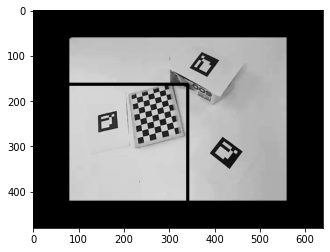

In [40]:
cam = cv2.VideoCapture("./entrada.mp4", 0)
template = cv2.imread("./alvo.jpg", 0)

# TM_CCOEFF_NORMED
methods = [
    cv2.TM_CCOEFF,
    cv2.TM_CCOEFF_NORMED,
    cv2.TM_CCORR,
    cv2.TM_CCORR_NORMED,
    cv2.TM_SQDIFF,
    cv2.TM_SQDIFF_NORMED
]

while(True):
    ret, frame = cam.read()
    
    if ret:
        for method in methods:
            copy = frame.copy()
            copy = cv2.cvtColor(copy, cv2.COLOR_BGR2GRAY)
            
            result = cv2.matchTemplate(copy, template, method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            
            if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                location = min_loc
            else:
                location = max_loc
            
            template_shape = template.shape
            bottom_right = (location[0] + template_shape[1], location[1] + template_shape[0])
            
            cv2.rectangle(copy, location, bottom_right, (0, 255, 0), 5)
            
            plt.imshow(copy, cmap='gray')
            
        break
    else:
        break

cam.release()
cv2.destroyAllWindows()

## Obtendo os parâmetros extrínsecos

In [6]:
 def initOpenGL(dimensions):
    (width, height) = dimensions
    
    glClearColor(0.0, 0.0, 0.0, 0.0)
    glClearDepth(1.0)

    glEnable(GL_DEPTH_TEST)

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
 
    fovy = 45
    aspect = (width)/(height)
    gluPerspective(fovy, aspect, 0.1, 100.0)
        
# def object3D(obj):
#     # translada o objeto para ficar 10 unidades distante da camera (para podermos ver o objeto)
#     glTranslate(0,0,-10)

#     # move o model em y para centralizar ele
#     glTranslate(0,-2,0)
#     # rotaciona o modelo para podermos ve-lo de frente
#     #glRotate(90,1,0,0)
#     glRotate(180,0,1,0)
#     # renderiza o modelo do Pikachu
#     glCallList(obj.gl_list)

#     # renderiza um cubo
#     # glutWireCube(2.0)

    
def displayCallback():
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()
    
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    
    # carregar o modelo 3D do Pikachu
    obj = OBJ("Pikachu.obj", swapyz=True)

    # habilita o uso de texturas (o Pikachu tem textura)
    glEnable(GL_TEXTURE_2D)

#     object3D(obj) 
        
    glutSwapBuffers()    
    

def idleCallback():
    glutPostRedisplay()

In [7]:
dimensions = (640, 480)

glutInit()
glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE)
glutSetOption(GLUT_ACTION_ON_WINDOW_CLOSE, GLUT_ACTION_CONTINUE_EXECUTION)

glutInitWindowSize(*dimensions)

window = glutCreateWindow(b'TP2 - Realidade Aumentada - Vinicius Gomes')
initOpenGL(dimensions)

glutDisplayFunc(displayCallback)
glutIdleFunc(idleCallback)

glutMainLoop()